In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/myavu/OneDrive/Masaüstü/Veriler/strokes.csv")
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [4]:
df.describe(exclude=["int64","float64"]).T

,count,unique,top,freq
gender,43400,3,Female,25665
ever_married,43400,2,Yes,27938
work_type,43400,5,Private,24834
Residence_type,43400,2,Urban,21756
smoking_status,30108,3,never smoked,16053


### I started to analyze nan values from smoking_status variable.

In [5]:
df["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [6]:
df["smoking_status"].isnull().sum()

13292

### for smoking_status variable; nan values are ~%31 which is too much. So we'll replace them instead of dropping.

In [7]:
df["smoking_status"].isnull().sum()/df.shape[0]

0.3062672811059908

In [8]:
df.groupby(["work_type","smoking_status"]).size().reset_index()

,work_type,smoking_status,0
0,Govt_job,formerly smoked,1091
1,Govt_job,never smoked,2291
2,Govt_job,smokes,964
3,Never_worked,formerly smoked,9
4,Never_worked,never smoked,85
...,...,...,...
10,Self-employed,never smoked,2707
11,Self-employed,smokes,1078
12,children,formerly smoked,104
13,children,never smoked,518


In [9]:
df[pd.isnull(df["smoking_status"])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [10]:
df["smoking_status"]=df["smoking_status"].replace(np.nan,"unknown")
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

### Our next variable is bmi. Let's check it.

In [11]:
df["bmi"].isnull().sum()

1462

In [12]:
df["bmi"].isnull().sum()/df.shape[0]

0.03368663594470046

### There is just 1148 values. We could drop them but there is too much stroke = 1 values. So we'll fill the nan values with bmi's mean rather than dropping.

In [13]:
df["bmi"].mean()

28.605038390004545

<AxesSubplot:>

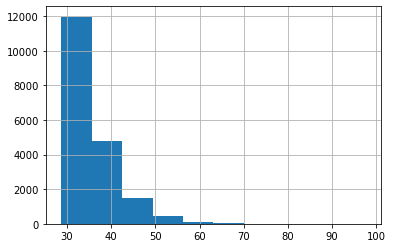

In [14]:
df[df["bmi"]>df["bmi"].mean()]["bmi"].hist()

<AxesSubplot:>

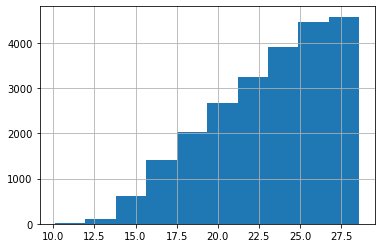

In [15]:
df[df["bmi"]<df["bmi"].mean()]["bmi"].hist()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

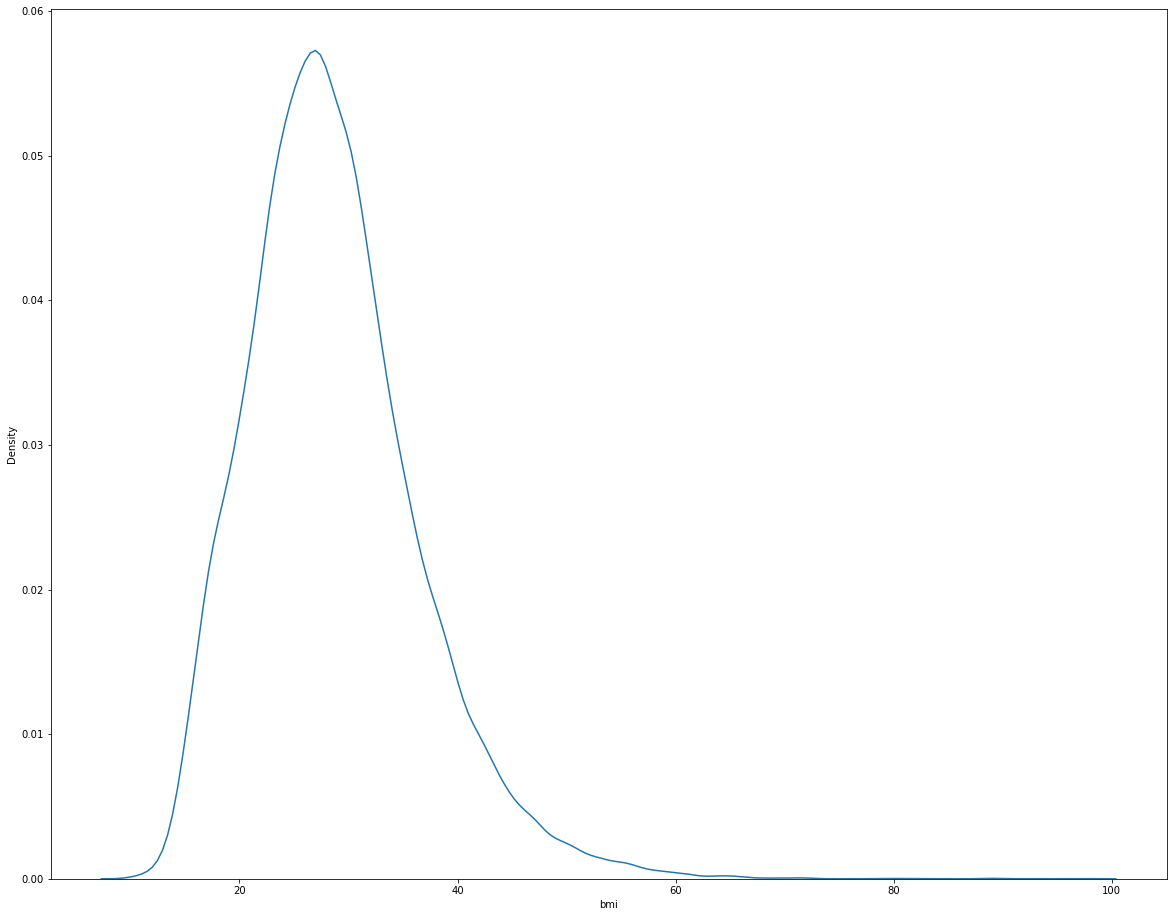

In [16]:
plt.figure(figsize=(20,16))
sns.kdeplot(x=df["bmi"])

### I filled bmi with mean of bmi.

In [17]:
df["bmi"]=df["bmi"].replace(np.nan,df["bmi"].mean())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
df=df.drop("id",axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### I just realized there is 3 gender categories. So I checked it and I decide to drop "Other". Cause there is just 11 values against 43k+ values.

In [19]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [20]:
print(df.loc[df.gender=="Other"].shape)
df.loc[df.gender=="Other"]

(11, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,Other,26.0,0,0,No,Private,Rural,143.33,22.400000,formerly smoked,0
10768,Other,46.0,0,0,No,Private,Rural,83.28,28.605038,never smoked,0
15620,Other,27.0,0,0,No,Private,Urban,62.45,28.605038,smokes,0
15838,Other,53.0,0,0,Yes,Private,Rural,89.65,28.605038,unknown,0
19748,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.000000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
21192,Other,49.0,0,0,Yes,Private,Urban,94.88,37.200000,never smoked,0
24252,Other,51.0,0,0,Yes,Private,Rural,91.75,32.200000,formerly smoked,0
26199,Other,10.0,0,0,No,children,Rural,72.05,21.200000,formerly smoked,0
26831,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,28.605038,unknown,0


In [21]:
df=df.loc[df.gender!="Other"]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43389 non-null  object 
 1   age                43389 non-null  float64
 2   hypertension       43389 non-null  int64  
 3   heart_disease      43389 non-null  int64  
 4   ever_married       43389 non-null  object 
 5   work_type          43389 non-null  object 
 6   Residence_type     43389 non-null  object 
 7   avg_glucose_level  43389 non-null  float64
 8   bmi                43389 non-null  float64
 9   smoking_status     43389 non-null  object 
 10  stroke             43389 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


### I'll use age variable as age_binned to understand how the stroke variable changes according to age.

<AxesSubplot:>

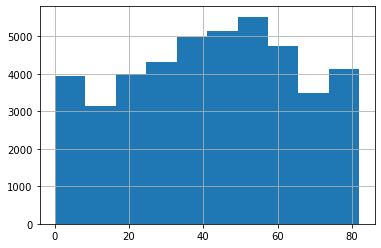

In [23]:
df["age"].hist()

In [24]:
df["age"].min(), df["age"].max()

(0.08, 82.0)

In [25]:
df["age_binned"]=pd.cut(df["age"],bins=np.arange(0,91,10))
df["age_binned"].unique()

[(0, 10], (50, 60], (60, 70], (10, 20], (40, 50], (70, 80], (30, 40], (20, 30], (80, 90]]
Categories (9, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

<AxesSubplot:>

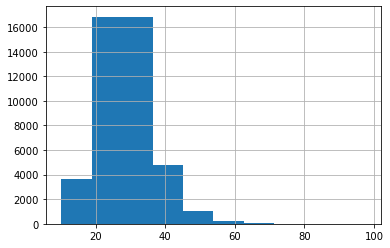

In [26]:
df["bmi"].hist()

In [27]:
df["bmi"].max()

97.6

### Same as age variable I'll use bmi and avg_glucose_level variable as binned.

In [28]:
df["bmi_binned"]=pd.cut(df["bmi"],bins=np.arange(0,101,10))
df["bmi_binned"].unique()

[(10, 20], (30, 40], (50, 60], (20, 30], (40, 50], (60, 70], (70, 80], (90, 100], (80, 90]]
Categories (9, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

<AxesSubplot:>

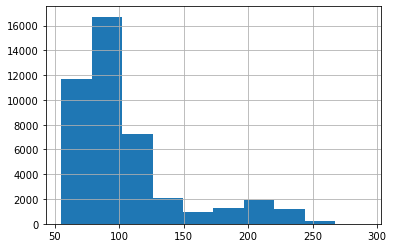

In [29]:
df["avg_glucose_level"].hist()

In [30]:
df["avg_glucose_level"].min(),df["avg_glucose_level"].max()

(55.0, 291.05)

In [31]:
df["avg_glucose_level_binned"]=pd.cut(df["avg_glucose_level"],bins=np.arange(50,301,25))
df["avg_glucose_level_binned"].unique()

[(75, 100], (100, 125], (50, 75], (150, 175], (200, 225], (225, 250], (125, 150], (175, 200], (250, 275], (275, 300]]
Categories (10, interval[int64]): [(50, 75] < (75, 100] < (100, 125] < (125, 150] ... (200, 225] < (225, 250] < (250, 275] < (275, 300]]

In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_binned,bmi_binned,avg_glucose_level_binned
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0,"(0, 10]","(10, 20]","(75, 100]"
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,"(50, 60]","(30, 40]","(75, 100]"
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0,"(0, 10]","(10, 20]","(100, 125]"
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,"(60, 70]","(30, 40]","(50, 75]"
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0,"(10, 20]","(10, 20]","(150, 175]"


### Preprocess steps ends here. Time for EDA.

##### At the end of EDA, I'll share my conclusions.

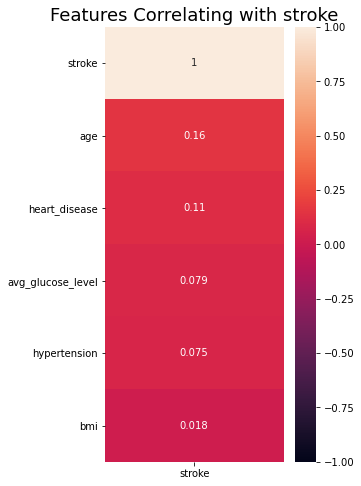

In [33]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr()[["stroke"]].sort_values(by="stroke", ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Features Correlating with stroke", fontdict={"fontsize":18});

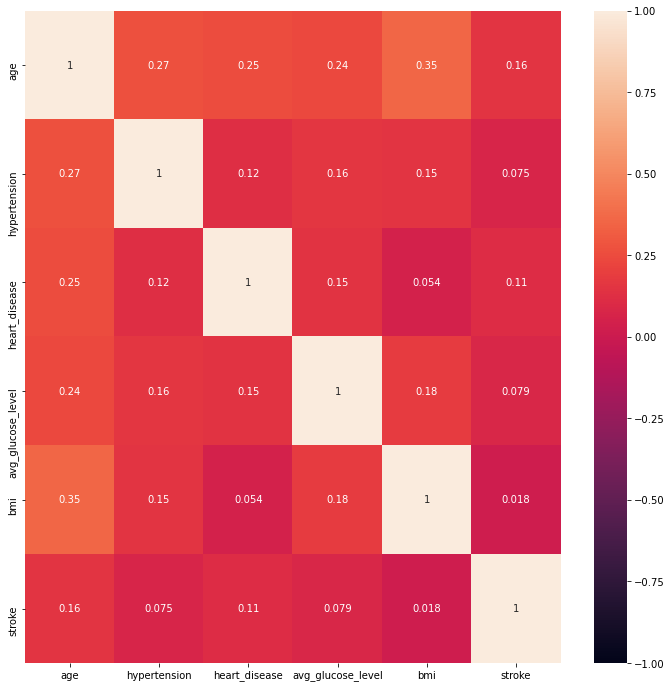

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

# 1

In [35]:
gender_age_groupby=df.groupby(["gender","age_binned"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_age_groupby

,gender,age_binned,stroke
17,Male,"(80, 90]",0.105114
8,Female,"(80, 90]",0.078212
7,Female,"(70, 80]",0.075214
16,Male,"(70, 80]",0.072797
15,Male,"(60, 70]",0.039964
...,...,...,...
0,Female,"(0, 10]",0.000447
1,Female,"(10, 20]",0.000418
10,Male,"(10, 20]",0.000000
2,Female,"(20, 30]",0.000000


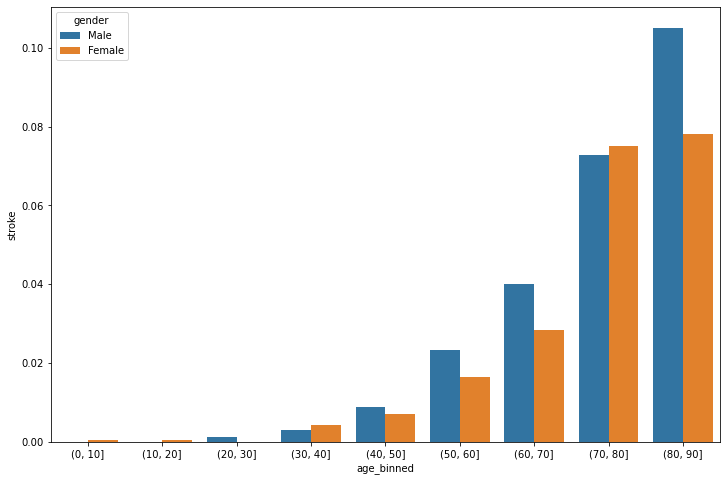

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x="age_binned"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_age_groupby)
plt.show()

# 2

In [37]:
gender_heartdisease_groupby=df.groupby(["gender","heart_disease"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_heartdisease_groupby

,gender,heart_disease,stroke
1,Female,1,0.091017
3,Male,1,0.082237
2,Male,0,0.015265
0,Female,0,0.014263


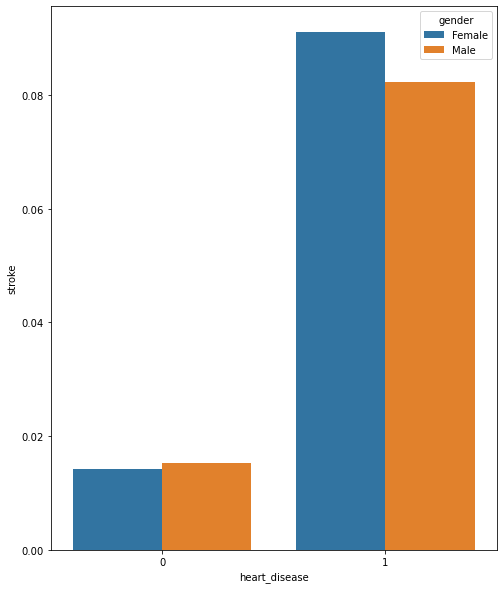

In [38]:
plt.figure(figsize=(8,10))
sns.barplot(x="heart_disease"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_heartdisease_groupby)
plt.show()

# 3

In [39]:
gender_avg_glucose_groupby=df.groupby(["gender","avg_glucose_level_binned"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_avg_glucose_groupby

,gender,avg_glucose_level_binned,stroke
18,Male,"(250, 275]",0.066667
6,Female,"(200, 225]",0.062673
17,Male,"(225, 250]",0.059867
15,Male,"(175, 200]",0.051724
8,Female,"(250, 275]",0.048780
...,...,...,...
10,Male,"(50, 75]",0.013643
3,Female,"(125, 150]",0.011005
1,Female,"(75, 100]",0.010834
9,Female,"(275, 300]",0.000000


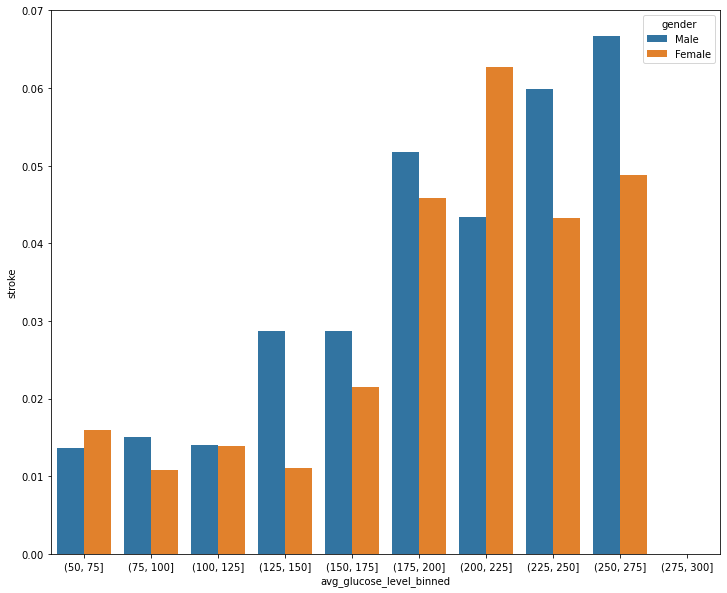

In [40]:
plt.figure(figsize=(12,10))
sns.barplot(x="avg_glucose_level_binned"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_avg_glucose_groupby)
plt.show()

# 4

In [41]:
gender_bmi_groupby=df.groupby(["gender","bmi_binned"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_bmi_groupby

,gender,bmi_binned,stroke
12,Male,"(20, 30]",0.024032
13,Male,"(30, 40]",0.021238
14,Male,"(40, 50]",0.020359
2,Female,"(20, 30]",0.020049
3,Female,"(30, 40]",0.016563
...,...,...,...
18,Male,"(80, 90]",0.000000
19,Male,"(90, 100]",0.000000
0,Female,"(0, 10]",NaN
9,Female,"(90, 100]",NaN


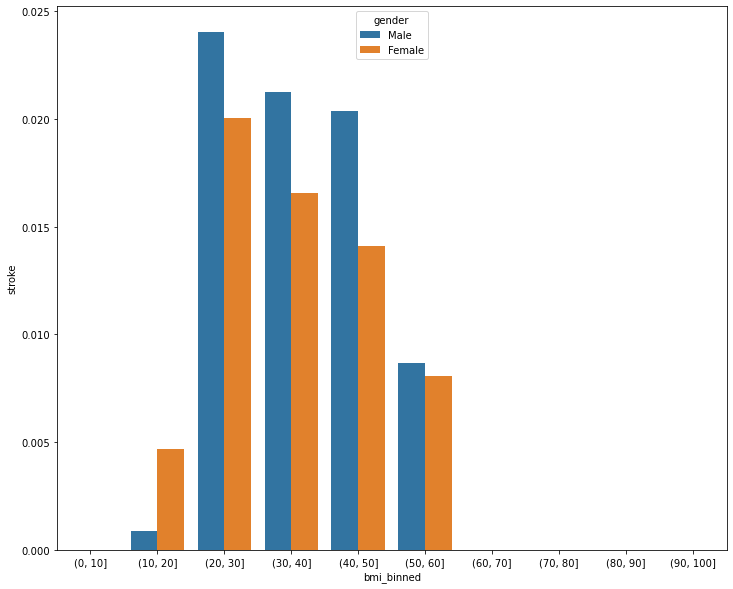

In [42]:
plt.figure(figsize=(12,10))
sns.barplot(x="bmi_binned"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_bmi_groupby)
plt.show()

# 5

In [43]:
gender_evermarried_groupby=df.groupby(["gender","ever_married"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_evermarried_groupby

,gender,ever_married,stroke
3,Male,Yes,0.028757
1,Female,Yes,0.022803
0,Female,No,0.005326
2,Male,No,0.004977


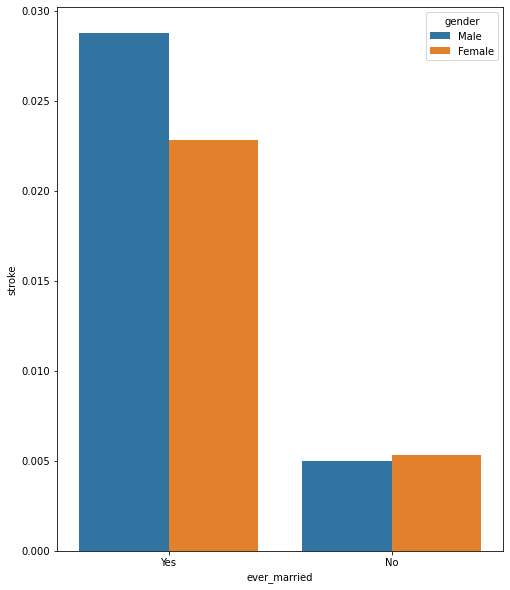

In [44]:
plt.figure(figsize=(8,10))
sns.barplot(x="ever_married"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_evermarried_groupby)
plt.show()

# 6

In [45]:
gender_residencetype_groupby=df.groupby(["gender","Residence_type"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_residencetype_groupby

,gender,Residence_type,stroke
3,Male,Urban,0.020108
2,Male,Rural,0.019610
1,Female,Urban,0.017122
0,Female,Rural,0.016464


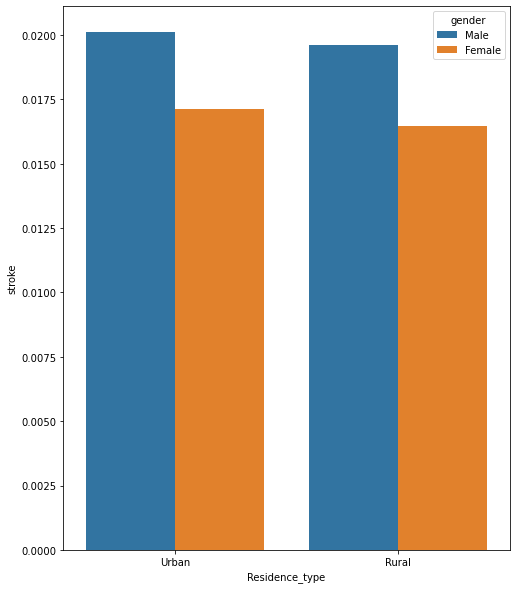

In [46]:
plt.figure(figsize=(8,10))
sns.barplot(x="Residence_type"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_residencetype_groupby)
plt.show()

# 7

In [47]:
gender_smokingstatus_groupby=df.groupby(["gender","smoking_status"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_smokingstatus_groupby

,gender,smoking_status,stroke
4,Male,formerly smoked,0.036499
0,Female,formerly smoked,0.023804
6,Male,smokes,0.023611
1,Female,never smoked,0.018641
2,Female,smokes,0.017658
5,Male,never smoked,0.015867
7,Male,unknown,0.012352
3,Female,unknown,0.009727


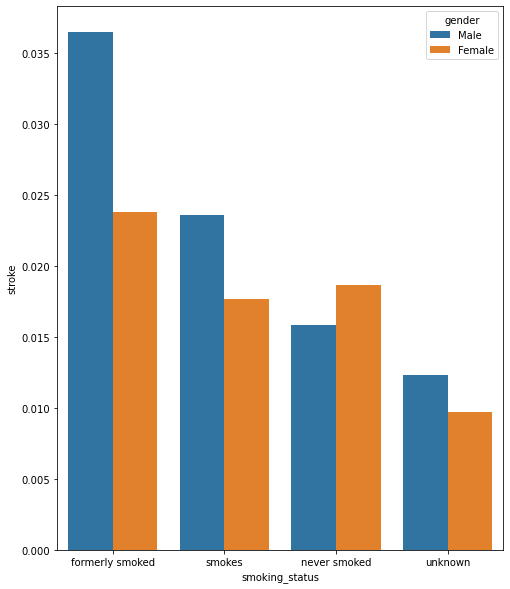

In [48]:
plt.figure(figsize=(8,10))
sns.barplot(x="smoking_status"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_smokingstatus_groupby)
plt.show()

# 8

In [49]:
gender_worktype_groupby=df.groupby(["gender","work_type"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_worktype_groupby

,gender,work_type,stroke
8,Male,Self-employed,0.041046
3,Female,Self-employed,0.034158
7,Male,Private,0.021685
0,Female,Govt_job,0.017512
2,Female,Private,0.015294
5,Male,Govt_job,0.014581
4,Female,children,0.000672
1,Female,Never_worked,0.000000
6,Male,Never_worked,0.000000
9,Male,children,0.000000


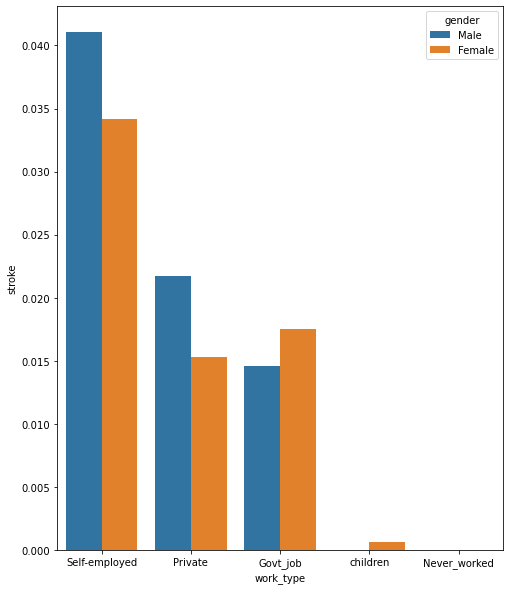

In [50]:
plt.figure(figsize=(8,10))
sns.barplot(x="work_type"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_worktype_groupby)
plt.show()

# 9

In [51]:
gender_hypertension_groupby=df.groupby(["gender","hypertension"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_hypertension_groupby

,gender,hypertension,stroke
1,Female,1,0.051487
3,Male,1,0.046460
2,Male,0,0.016838
0,Female,0,0.013455


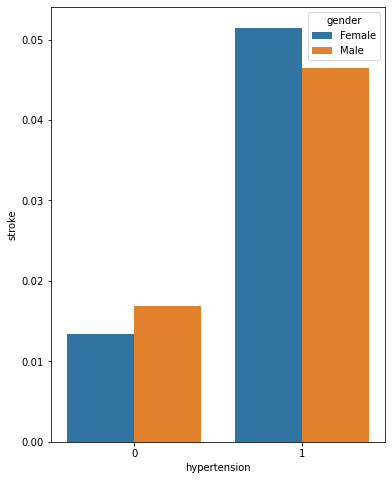

In [52]:
plt.figure(figsize=(6,8))
sns.barplot(x="hypertension"
            ,y="stroke"
            ,hue="gender"
            ,data=gender_hypertension_groupby)
plt.show()

# 10

In [53]:
gender_hypertension_and_heartdisease_groupby=df.groupby(["gender"
                                                         ,"heart_disease"
                                                         ,"hypertension"])["stroke"].mean().reset_index().sort_values(by="stroke",ascending=False)
gender_hypertension_and_heartdisease_groupby

,gender,heart_disease,hypertension,stroke
3,Female,1,1,0.109589
7,Male,1,1,0.094595
2,Female,1,0,0.084530
6,Male,1,0,0.078261
1,Female,0,1,0.045231
5,Male,0,1,0.037037
4,Male,0,0,0.013070
0,Female,0,0,0.011499


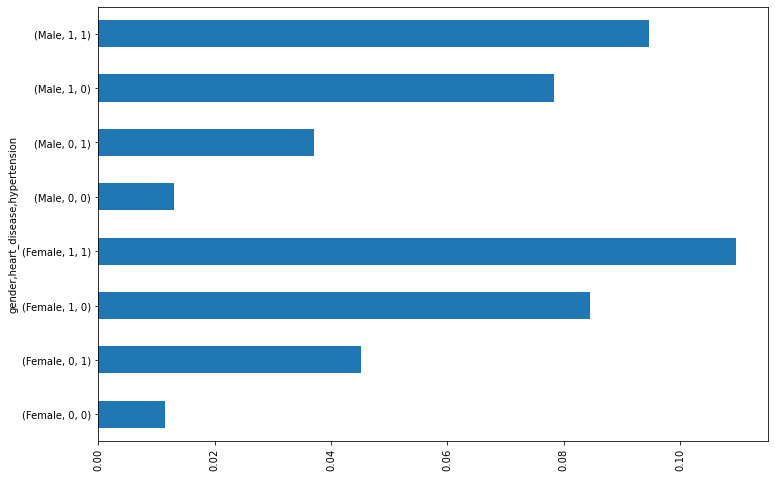

In [54]:
df.groupby(["gender"
            ,"heart_disease"
            ,"hypertension"])["stroke"].mean().plot(kind="barh",figsize=(12,8))
plt.xticks(rotation="90")
plt.show()

### Our EDA ends here. Here is my conclusions.
##### 1- Older age people more likely to stroke and there is normal correlation between age and stroke.
##### 2- Heart disease is highly effects stroke and it's not depends on gender.
##### 3- For both gender, between 175-275 average glucose level is dangerous. In this area there is high stroke chance.
##### 4- bmi stands for body mass index. Everyone expects to see; if your bmi level is high, you are also likely to have high stroke risk. But here ,there is nothing like that. For men, if the BMI level is between 20-50, the chance of a stroke is over 2%, and for those above bmi level of 50, the chance of a stroke is less than 2%. For women, the chance of having a stroke decreases by ~0.005 for every 10 bmi levels that increase after 20 bmi levels.
##### 5- For both gender, marriage is highly effects stroke chance. Who married at least for once men and women stroke chance is ~%3 and for not ever married men and women stroke chance is ~%0.5.
##### 6- No significante difference between residance types.
##### 7- For both gender, but especially for men, there is a very different connection between formerley smoked, smokes and never smoked categories. For men; if you are a formerly smoked then your stroke chance is above %3.5, if you are a smoker then your stroke chance is ~%2.5 and if you are never smoked then your stroke chance is almost ~%1.5. But for women; if you are a formerly smoked then your stroke chance is almost ~%2.5, if you are a smoker then your stroke chance is ~%1.5 and if you are never smoked then your stroke chance is almost ~%2. As you can see there is a different correlation than our expectations. Formerly smoked people has more chance to get stroke then never smoked and smoker people. Female smokers are less likely to have a stroke than women who have never smoked. This is interesting I think.
##### 8- Self-employed have a stroke chance of +4% for men and ~3.5% for women. Men working in the private have a +2% chance of stroke, women 1.5%. While the chance of stroke for men who are govt_job decreases from 2% to 1.5%, this rate increases and approaches 2% for women.
##### 9- Hypertension is highly effects stroke and it's not depends on gender.
##### 10- Here we see that while there is a very low difference in the probability of having a stroke between men and women with hypertension or heart disease, women with both heart disease and hypertension have a higher chance of having a stroke than men. The difference between them is around ~2%.